In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('combined.xlsx')
data = data.drop(columns = 'time')
data

,area,velocity
0,0.007782,10.000000
1,0.007843,10.728969
2,0.007719,10.951057
3,0.007480,10.309017
4,0.007183,9.271031
...,...,...
43896,0.002988,10.187381
43897,0.003163,9.229487
43898,0.003103,9.031417
43899,0.002930,9.690983


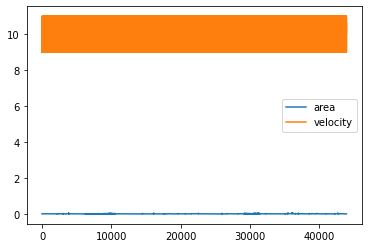

In [ ]:
len(data)
data.plot()

In [ ]:
import os
import cv2
import csv

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop


In [ ]:
def split_columns(df, window_size=48):
  df_as_np = df.to_numpy()

  df_area_as_np = df['area'].to_numpy()
  df_velocity_as_np = df['velocity'].to_numpy()

  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    x = [i for i in df_area_as_np[i:i+window_size]]
    X.append(x)
    label = df_velocity_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)


In [ ]:
x, y = split_columns(data)
x.shape, y.shape

((43853, 48), (43853,))

In [ ]:
# X2_train, y2_train = X2[:2000], y2[:2000]
# X2_val, y2_val = X2[2000:2105], y2[2000:2105]
# X2_test, y2_test = X2[2105:], y2[2105:]
# X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# x_train = x_train.reshape(-1,1)
# x_test = x_test.reshape(-1,1)
# y_train = y_train.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

In [ ]:
x_test

array([[0.00554036, 0.00577257, 0.00569661, ..., 0.00561523, 0.00601562,
        0.00585503],
       [0.00385995, 0.00381559, 0.00369117, ..., 0.00335938, 0.00344232,
        0.00328125],
       [0.00609918, 0.00586155, 0.00562391, ..., 0.00508898, 0.00523872,
        0.00507812],
       ...,
       [0.00839461, 0.00917681, 0.0091682 , ..., 0.00852865, 0.00859519,
        0.00872444],
       [0.00792969, 0.00765516, 0.00802409, ..., 0.00840169, 0.00830729,
        0.00783963],
       [0.0133518 , 0.0131196 , 0.0142253 , ..., 0.0107357 , 0.0112793 ,
        0.0109375 ]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Bidirectional


model = Sequential()
model.add(InputLayer((12, 1)))
model.add(LSTM(15))

model.add(Dense(1, name = 'output', kernel_initializer = 'random_uniform'))

In [ ]:
model = Sequential()
model.add(InputLayer((12, 1)))
model.add(LSTM(15))
model.add(Dense(1, name = 'output', kernel_initializer = 'random_uniform'))

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
cp1 = ModelCheckpoint('model2/', save_best_only=True)

In [ ]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1 = model.fit(x_train, y_train, validation_split = 0.2, epochs=15, callbacks=[cp1])

Epoch 1/15
878/878 [==============================] - ETA: 0s - loss: 20.4168 - root_mean_squared_error: 4.5185

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


878/878 [==============================] - 11s 11ms/step - loss: 20.4168 - root_mean_squared_error: 4.5185 - val_loss: 0.5034 - val_root_mean_squared_error: 0.7095
Epoch 2/15
872/878 [============================>.] - ETA: 0s - loss: 0.4976 - root_mean_squared_error: 0.7054

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


878/878 [==============================] - 8s 9ms/step - loss: 0.4976 - root_mean_squared_error: 0.7054 - val_loss: 0.5031 - val_root_mean_squared_error: 0.7093
Epoch 3/15
878/878 [==============================] - 5s 5ms/step - loss: 0.4981 - root_mean_squared_error: 0.7058 - val_loss: 0.5036 - val_root_mean_squared_error: 0.7097
Epoch 4/15
878/878 [==============================] - 5s 5ms/step - loss: 0.4982 - root_mean_squared_error: 0.7058 - val_loss: 0.5032 - val_root_mean_squared_error: 0.7093
Epoch 5/15
878/878 [==============================] - 5s 6ms/step - loss: 0.4987 - root_mean_squared_error: 0.7062 - val_loss: 0.5032 - val_root_mean_squared_error: 0.7093
Epoch 6/15
878/878 [==============================] - 5s 5ms/step - loss: 0.4995 - root_mean_squared_error: 0.7067 - val_loss: 0.5096 - val_root_mean_squared_error: 0.7139
Epoch 7/15
878/878 [==============================] - 5s 5ms/step - loss: 0.5010 - root_mean_squared_error: 0.7078 - val_loss: 0.5045 - val_root_mean_s

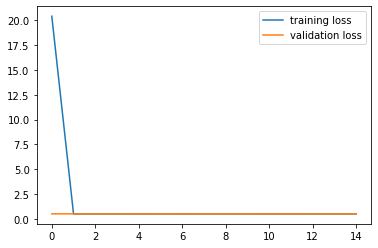

In [ ]:
plt.plot(model1.history['loss'], label = 'training loss')
plt.plot(model1.history['val_loss'], label ='validation loss')
plt.legend()

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model2/')

0.7050458987354142

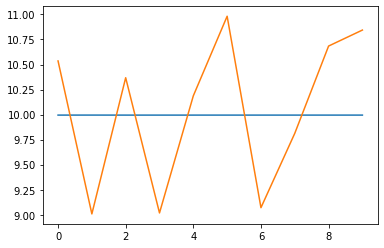

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

def plot_predictions1(model, X, y, start=0, end=10):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(predictions[start:end])
  plt.plot(y[start:end])
  return sqrt(mse(y, predictions))
plot_predictions1(model1, x_test, y_test)

In [ ]:
test_predictions = model1.predict(x_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

,Test Predictions,Actuals
0,9.998750,11.000000
1,9.998686,10.968583
2,9.998743,10.481754
3,9.998971,9.190983
4,9.999004,10.425779
...,...,...
8766,9.998889,10.728969
8767,9.998878,10.904827
8768,9.999027,11.000000
8769,9.998754,9.518246


In [ ]:
print("Loss: "  + str(mse(y_test, test_predictions)))
print("RMSE: "  + str(sqrt(mse(y_test, test_predictions))))

Loss: 0.5050496789559312
RMSE: 0.7106684733094125


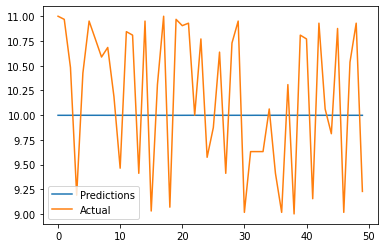

In [ ]:
plt.plot(test_results['Test Predictions'][:50], label = 'Predictions')
plt.plot(test_results['Actuals'][:50], label = 'Actual')
plt.legend()

In [ ]:
!zip -r /content/model1.zip /content/model1

  adding: content/model1/ (stored 0%)
  adding: content/model1/variables/ (stored 0%)
  adding: content/model1/variables/variables.index (deflated 61%)
  adding: content/model1/variables/variables.data-00000-of-00001 (deflated 25%)
  adding: content/model1/saved_model.pb (deflated 90%)
  adding: content/model1/assets/ (stored 0%)
  adding: content/model1/keras_metadata.pb (deflated 85%)
